In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olc-data-science-final-project/sample_submission.csv
/kaggle/input/olc-data-science-final-project/train.csv
/kaggle/input/olc-data-science-final-project/test.csv


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv("/kaggle/input/olc-data-science-final-project/train.csv")

## Menampilkan Informasi Mengenai Data

In [66]:
df.head()

,id,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,7581,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,7582,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,7583,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,7584,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,7585,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [67]:
df.shape

(5346, 20)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346 entries, 0 to 5345
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5346 non-null   int64  
 1   Churn                        5346 non-null   int64  
 2   Tenure                       5094 non-null   float64
 3   PreferredLoginDevice         5346 non-null   object 
 4   CityTier                     5346 non-null   int64  
 5   WarehouseToHome              5109 non-null   float64
 6   PreferredPaymentMode         5346 non-null   object 
 7   Gender                       5346 non-null   object 
 8   HourSpendOnApp               5107 non-null   float64
 9   NumberOfDeviceRegistered     5346 non-null   int64  
 10  PreferedOrderCat             5346 non-null   object 
 11  SatisfactionScore            5346 non-null   int64  
 12  MaritalStatus                5346 non-null   object 
 13  NumberOfAddress   

## EDA (Exploratory Data Analysis)
### Univariate Analysis
Akan dilakukan deskripsi data singkat dan beberapa checking seperti cek data null, dan lain-lain untuk melihat kualitas dataset.

### Deskripsi Data Singkat

In [69]:
df.set_index('id', inplace=True)
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5346.000000,5094.000000,5346.000000,5109.000000,5107.000000,5346.000000,5346.000000,5346.000000,5346.000000,5091.000000,5098.000000,5095.000000,5054.000000,5346.000000
mean,0.150767,10.331370,1.653573,15.639656,2.929900,3.682379,3.060793,4.203517,0.281893,15.707916,1.753237,3.015505,4.574199,177.575103
std,0.357855,8.552108,0.915761,8.543449,0.725144,1.024369,1.379066,2.577900,0.449964,3.671605,1.903889,2.951305,3.646069,49.429138
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.900000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.480000
75%,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,197.140000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Cek Null Data

In [70]:
df.isnull().sum()/len(df)*100

Churn                          0.000000
Tenure                         4.713805
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.433221
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.470632
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.769921
CouponUsed                     4.638982
OrderCount                     4.695099
DaySinceLastOrder              5.462028
CashbackAmount                 0.000000
dtype: float64

Terdapat data yang null, hal ini dapat menjadi masalah karena model yang digunakan tidak menerima null value. Maka dari itu, akan dilakukan handling null value terlebih dahulu.

### Cek Unique Data

In [71]:
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')

Churn : 2 labels
Tenure : 37 labels
PreferredLoginDevice : 3 labels
CityTier : 3 labels
WarehouseToHome : 35 labels
PreferredPaymentMode : 7 labels
Gender : 2 labels
HourSpendOnApp : 7 labels
NumberOfDeviceRegistered : 6 labels
PreferedOrderCat : 6 labels
SatisfactionScore : 5 labels
MaritalStatus : 3 labels
NumberOfAddress : 15 labels
Complain : 2 labels
OrderAmountHikeFromlastYear : 17 labels
CouponUsed : 17 labels
OrderCount : 17 labels
DaySinceLastOrder : 22 labels
CashbackAmount : 2562 labels


### Cek Imbalance Data

In [72]:
df.Churn.value_counts()

Churn
0    4540
1     806
Name: count, dtype: int64

Dapat dilihat bahwa data imbalance karena class minority (churn = 1) memiliki prosentase 15% dari keseluruhan data. Ini termasuk Moderate imbalance dan kita akan melakukan teknik sampling untuk meningkatkan akurasi model.

Mengapa data imbalance perlu diatasi? Karena model akan menghabiskan waktunya untuk belajar dan memprediksi dari kelas mayoritas (dalam kasus ini tidak churn), serta akan mengabaikan kelas minoritas (churn). Hal ini buruk karena kita ingin model bisa memprediksi apakah customer akan churn dan dari sana kita bisa ambil langkah/decision untuk mengatasi customer yang churn.

### Kesimpulan:
1. Terdapat data yang null, sehingga harus dilakukan handling null value terlebih dahulu sebelum bisa dilakukan modelling dan correlation analysis.
2. Terdapat data imbalance, sehingga harus dilakukan sampling terlebih dahulu.

### Bivariate Analysis
Goal dari EDA adalah untuk menjawab pertanyaan-pertanyaan yang mungkin ditemui ketika berhadapan dengan data. Dalam kasus kita, kita ingin mengetahui tentang rate customer churn dan bagaimana customer bisa churn. 
Untuk yang belum tahu churn itu apa, churn adalah suatu indikator yang menyatakan apakah customer berhenti menggunakan produk yang dihasilkan oleh suatu perusahaan. Kita ingin tahu berapa banyak sih customer yang berhenti menggunakan produk dari perusahaan kita? Dan apa penyebab-penyebab yang mungkin?

In [73]:
# Guna mempermudah penafsiran grafik, akan diubah nilai 1 menjadi "Yes" dan 0 menjadi "No"
kolom_biner = ['Churn', 'Complain']
for kolom in kolom_biner:
    df[kolom] = df[kolom].replace({0:'No', 1:'Yes'})

### Berapa Banyak Customer yang Churn?

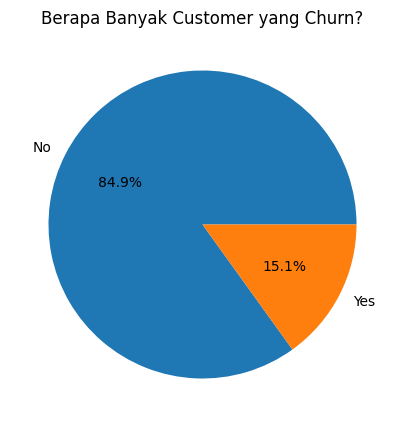

In [74]:
churn_count = df.Churn.value_counts()
plt.figure(figsize = (5,5))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%')

plt.title('Berapa Banyak Customer yang Churn?')
plt.show()

Dari total 5346 orang customer, **hanya 15% saja yang churn.** Hal ini merupakan pertanda baik bagi perusahaan karena itu berarti hanya sedengandikit saja customer yang berhenti menggunakan produk perusahaan. Namun, kita ingin menganalisis lebih dalam lagi mengenai bagaimana churn bisa terjadi supaya ke depannya kita dapat memprediksi dan meminimalisir angka persentase churn. \
Kita akan coba mencari kecenderungan antara churn dengan fitur-fitur independen seperti tenure, complain, gender, dan lain-lain.

### Kaitan Complain dengan Churn

In [75]:
df.groupby(['Complain','Churn'])['Churn'].count()

Complain  Churn
No        No       3471
          Yes       368
Yes       No       1069
          Yes       438
Name: Churn, dtype: int64

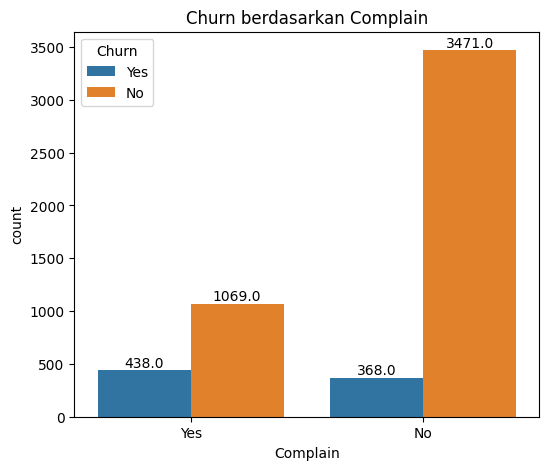

Text(0.5, 1.0, 'Persentase Churn dari Complain')

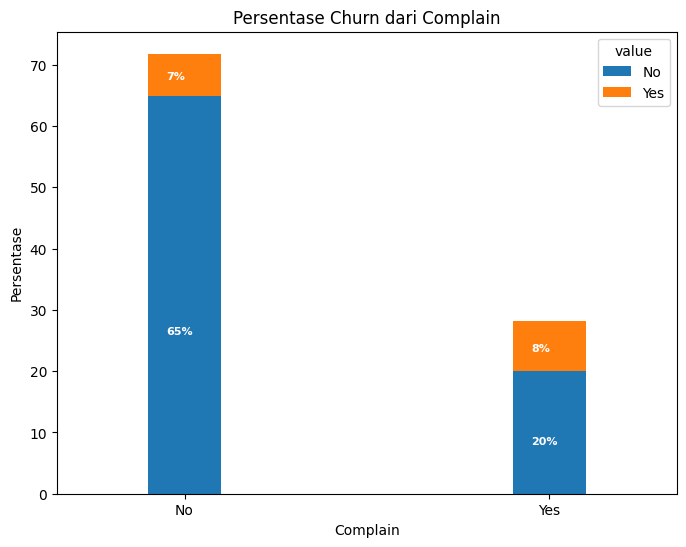

In [76]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Complain', hue='Churn')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Churn berdasarkan Complain')
plt.show()

df2 = pd.melt(df, id_vars=['Complain'], value_vars=['Churn'])
df3 = df2.groupby(['Complain','value']).size().unstack()
df3 = df3*100/len(df)
ax = df3.plot.bar(stacked=True,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 8)
    
plt.xlabel('Complain')
plt.ylabel('Persentase')
plt.title('Persentase Churn dari Complain')

Tampak bahwa memang kebanyakan customer tidak churn, tetapi proporsi customer yang churn kebanyakan datang dari mereka yang memiliki komplain terhadap perusahaan. **8% (438 orang) dari total 28% orang** yang komplain adalah customer yang akhirnya churn.

### Kaitan Gender dan Marital Status dengan Churn

Text(0.5, 1.0, 'Persentase Churn dari Gender')

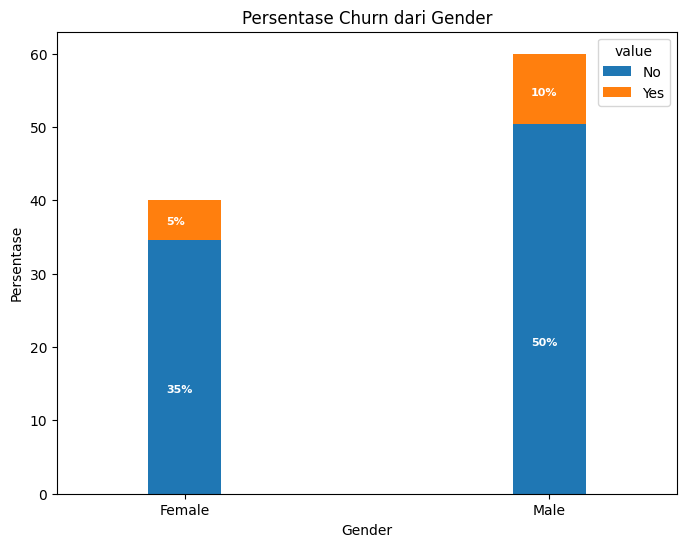

In [77]:
df2 = pd.melt(df, id_vars=['Gender'], value_vars=['Churn'])
df3 = df2.groupby(['Gender','value']).size().unstack()
df3 = df3*100/len(df)
ax = df3.plot.bar(stacked=True,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 8)
    
plt.xlabel('Gender')
plt.ylabel('Persentase')
plt.title('Persentase Churn dari Gender')

Text(0.5, 1.0, 'Persentase Churn dari MaritalStatus')

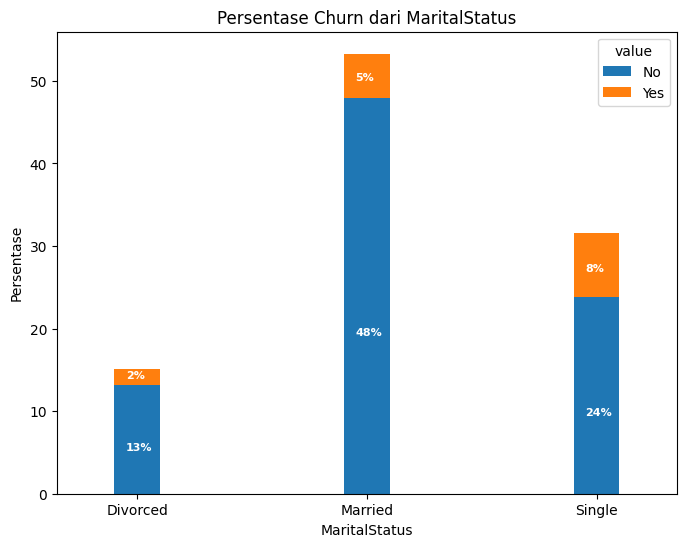

In [78]:
df2 = pd.melt(df, id_vars=['MaritalStatus'], value_vars=['Churn'])
df3 = df2.groupby(['MaritalStatus','value']).size().unstack()
df3 = df3*100/len(df)
ax = df3.plot.bar(stacked=True,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 8)
    
plt.xlabel('MaritalStatus')
plt.ylabel('Persentase')
plt.title('Persentase Churn dari MaritalStatus')

Observasi:
- Demografi customer kebanyakan adalah pria yang sudah menikah (male and married).
- Churn lebih banyak terjadi pada pria dan orang yang single.

### Kaitan SatisfactionScore dengan Churn

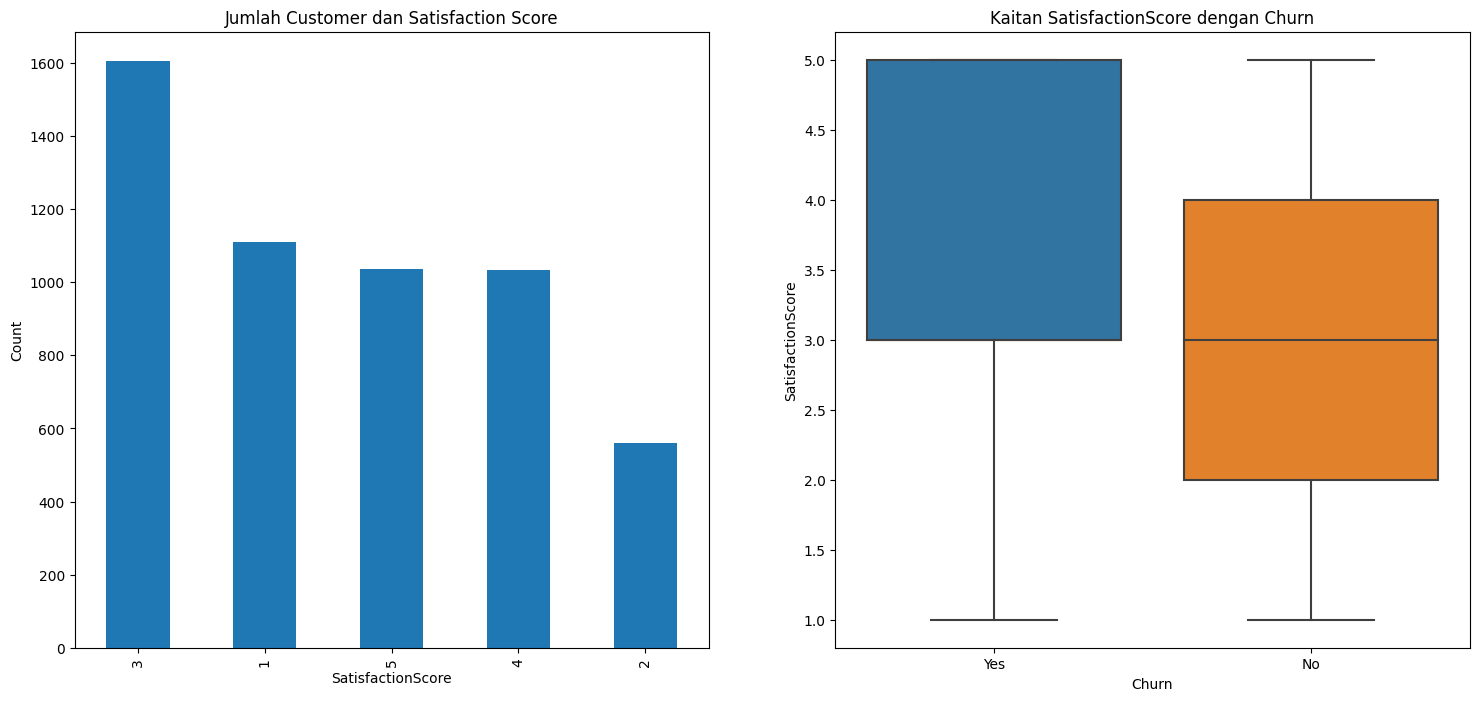

In [79]:
f,ax=plt.subplots(1, 2,figsize=(18,8))
df['SatisfactionScore'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Jumlah Customer dan Satisfaction Score')
ax[0].set_ylabel('Count')

ax[1] = sns.boxplot(data=df, x='Churn', y='SatisfactionScore')

plt.title('Kaitan SatisfactionScore dengan Churn')
plt.show()

Terdapat insight yang dapat diperoleh dari grafik di atas:
- Perusahaan memiliki skor kepuasan yang biasa saja (moderate), dibuktikan dari banyaknya customer yang memberikan rating 3/5 ke perusahaan.
- Customer yang churn memberikan nilai skor kepuasaan yang tinggi. Hal ini mungkin disebabkan oleh customer yang hanya menilai perusahaan dari 1 produk saja dan berhenti menggunakan produk setelah itu. 

### Kaitan Tenure dengan Churn

Tenure didefinisikan sebagai lamanya waktu yang dihabiskan oleh customer bersama dengan perusahaan. Kita akan melihat apakah ada kecenderungan antara tenure dan churn

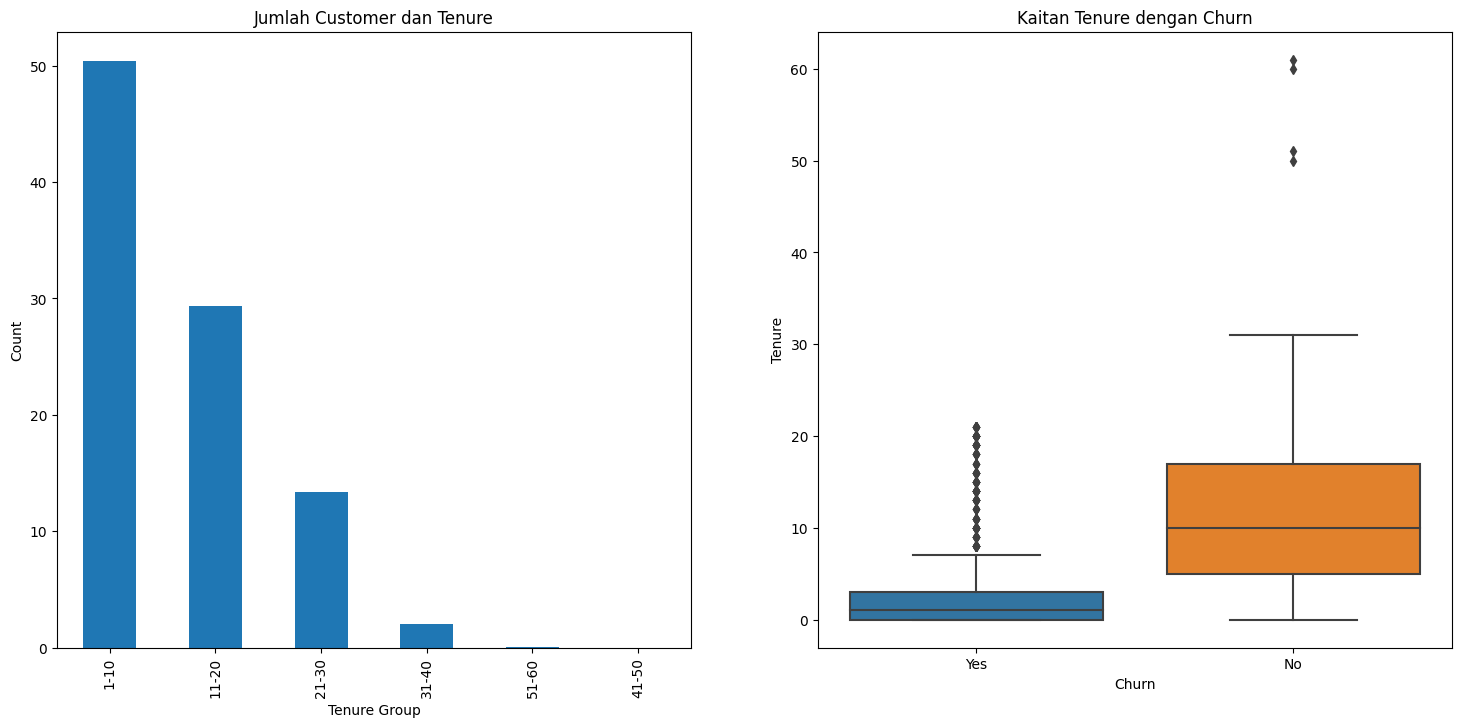

In [80]:
# Lakukan binning
df1 = df.copy()
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60']
df1['Tenure Group'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=False)

f,ax=plt.subplots(1,2,figsize=(18,8))
(df1['Tenure Group'].value_counts()*100.0 /len(df1)).plot.bar(ax=ax[0])
ax[0].set_title('Jumlah Customer dan Tenure')
ax[0].set_ylabel('Count')

ax[1] = sns.boxplot(data=df, x='Churn', y='Tenure')

plt.title('Kaitan Tenure dengan Churn')
plt.show()

Terdapat beberapa insight dari grafik di atas.
- Pertama, kebanyakan customer memiliki nilai tenure yang kecil (pada range 1-10) atau dalam kata lain kebanyakan customer menghabiskan waktu yang sedikit dengan perusahaan.
- Kedua, customer yang churn kebanyakan merupakan customer yang menghabiskan waktu yang sedikit dengan perusahaan (tenure kecil). Hal ini masuk akal karena semakin lama waktu yang dihabiskan bersama perusahaan maka kemungkinan customer berhenti menggunakan produk perusahaan semakin kecil.  

### Kaitan CashbackAmount dengan Churn

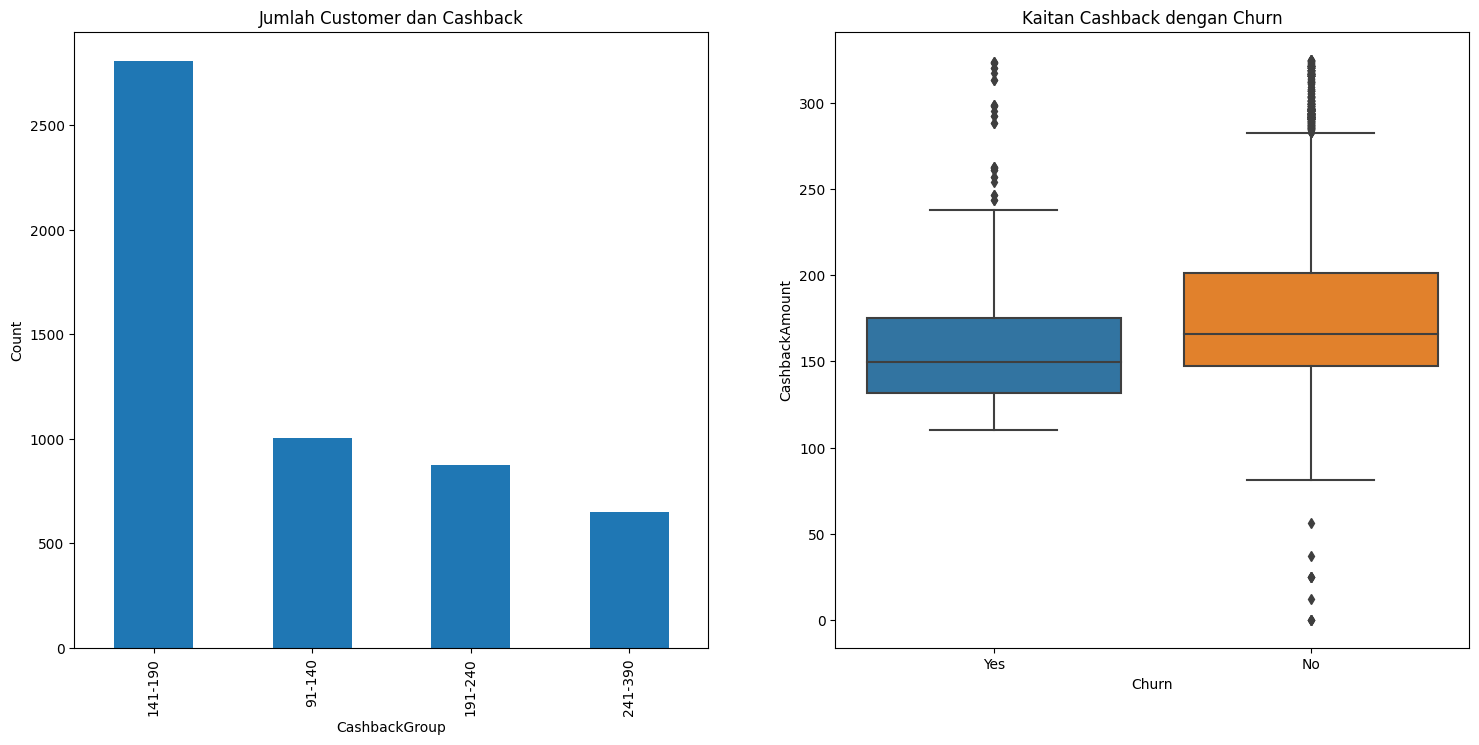

In [81]:
# Lakukan binning
bins = [90, 140, 190, 240, 390]
labels = ['91-140', '141-190', '191-240', '241-390']
df1['CashbackGroup'] = pd.cut(df['CashbackAmount'], bins=bins, labels=labels, right=False)

f,ax=plt.subplots(1,2,figsize=(18,8))
df1['CashbackGroup'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Jumlah Customer dan Cashback')
ax[0].set_ylabel('Count')

ax[1] = sns.boxplot(data=df, x='Churn', y='CashbackAmount')

plt.title('Kaitan Cashback dengan Churn')
plt.show()

In [82]:
print("Nilai cashback tertinggi yang diberikan: ", df['CashbackAmount'].max())
print("Nilai cashback terendah yang diberikan: ", df['CashbackAmount'].min())

Nilai cashback tertinggi yang diberikan:  324.99
Nilai cashback terendah yang diberikan:  0.0


Observasi:
- Kebanyakan customer mendapatkan cashback di range harga 141-190 dollar dengan nilai cashback tertinggi seharga 324.99 dollar.
- Customer yang tidak churn mendapatkan cashback yang lebih besar daripada customer yang churn.

### Kaitan DaySinceLastOrder dengan Churn

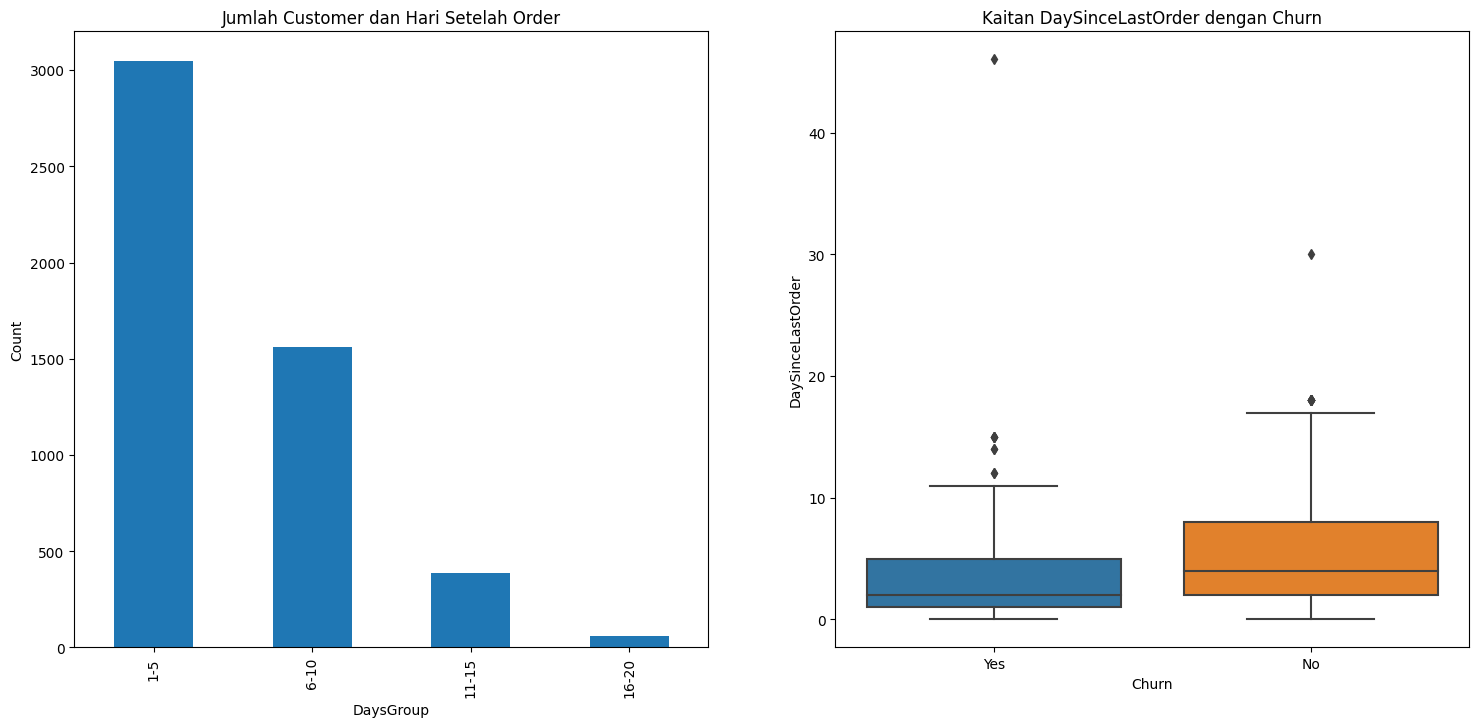

In [83]:
# Lakukan binning
bins = [0, 5, 10, 15, 20]
labels = ['1-5', '6-10', '11-15', '16-20']
df1['DaysGroup'] = pd.cut(df['DaySinceLastOrder'], bins=bins, labels=labels, right=False)

f,ax=plt.subplots(1,2,figsize=(18,8))
df1['DaysGroup'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Jumlah Customer dan Hari Setelah Order')
ax[0].set_ylabel('Count')

ax[1] = sns.boxplot(data=df, x='Churn', y='DaySinceLastOrder')

plt.title('Kaitan DaySinceLastOrder dengan Churn')
plt.show()

Terdapat beberapa observasi yang menarik:
- Kebanyakan customer baru saja berbelanja/melakukan order. Bisa dilihat dari grup DaySinceLastOrder, grup dengan frekuensi terbanyak ada di 1-5 hari.
- Terdapat outlier ekstrem pada data
- Customer yang churn memiliki nilai DaySinceLastOrder yang lebih rendah dibandingkan customer yang tidak churn. Hal ini menunjukkan customer yang sering memesan barang malah lebih berpotensi untuk churn. Mungkin saja customer hanya sering memesan barang tetapi tidak memiliki brand loyalty

## Data Cleaning
Sebelum data bisa diolah oleh model, perlu dilakukan berbagai teknik data cleaning seperti encoding untuk data kategorikal karena model hanya menerima jenis data numerik saja dan handling null value. 

### Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder
kolom_kategorikal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Gender']

LE = LabelEncoder()

for kolom in kolom_kategorikal:
  df[kolom] = LE.fit_transform(df[kolom])

kolom_biner = ['Churn', 'Complain']
for kolom in kolom_biner:
    df[kolom] = df[kolom].replace({'No':0, 'Yes':1})

### Handling Null Values
Handling null values dengan mengisi baris null dengan mediannya karena semua kolom yang memiliki null value merupakan kolom kontinu.

In [85]:
kolom_null = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed','OrderCount','DaySinceLastOrder']
for kolom in kolom_null:
    df[kolom] = df[kolom].fillna(df[kolom].median())

Menggunakan fill with median karena data berupa data numerik dan median kebal terhadap masalah outlier.

In [86]:
df.isnull().sum()/len(df)*100

Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

### Correlation Analysis

In [87]:
    corr = df.corr()
    corr.style.background_gradient()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.324190,0.007355,0.086903,0.072118,-0.023085,0.030559,0.018419,0.097483,0.115523,0.097051,0.135351,0.036904,0.244921,-0.013611,-0.000265,-0.023175,-0.149885,-0.147151
Tenure,-0.324190,1.000000,-0.085273,-0.055755,-0.010012,0.050318,-0.044119,-0.021860,-0.016747,-0.179280,-0.011731,-0.101089,0.239735,-0.018756,-0.003479,0.101451,0.165332,0.174343,0.465963
PreferredLoginDevice,0.007355,-0.085273,1.000000,-0.071623,-0.032771,-0.084257,0.006284,-0.071846,-0.103924,0.171068,0.048904,-0.004761,-0.058058,-0.003773,-0.011988,-0.103849,-0.114915,-0.109544,-0.234290
CityTier,0.086903,-0.055755,-0.071623,1.000000,0.011977,0.238869,-0.023079,-0.006346,0.030867,-0.188189,-0.009690,0.010720,-0.027190,0.006386,-0.021619,0.023571,0.033335,0.008267,0.053974
WarehouseToHome,0.072118,-0.010012,-0.032771,0.011977,1.000000,0.016646,0.003668,0.065516,0.025842,-0.073877,0.006228,-0.008509,-0.005113,0.027786,0.038083,0.006284,0.002444,0.018520,-0.001232
PreferredPaymentMode,-0.023085,0.050318,-0.084257,0.238869,0.016646,1.000000,-0.001687,0.049770,0.069723,-0.087712,-0.016093,-0.020538,0.028400,0.016750,0.024206,0.055565,0.033148,0.057941,0.163920
Gender,0.030559,-0.044119,0.006284,-0.023079,0.003668,-0.001687,1.000000,-0.023864,-0.023373,0.069444,-0.039011,-0.017227,-0.033691,-0.040517,-0.001099,-0.037416,-0.028261,-0.019312,-0.024977
HourSpendOnApp,0.018419,-0.021860,-0.071846,-0.006346,0.065516,0.049770,-0.023864,1.000000,0.308986,0.096993,0.030001,-0.036702,0.137172,0.001125,0.098421,0.186440,0.100800,0.063462,0.113213
NumberOfDeviceRegistered,0.097483,-0.016747,-0.103924,0.030867,0.025842,0.069723,-0.023373,0.308986,1.000000,0.042246,-0.019041,0.031257,0.077478,-0.000952,0.067365,0.160101,0.110587,0.018145,0.139636
PreferedOrderCat,0.115523,-0.179280,0.171068,-0.188189,-0.073877,-0.087712,0.069444,0.096993,0.042246,1.000000,-0.002998,0.035582,-0.073222,-0.010385,-0.001928,-0.100804,-0.114940,-0.145976,-0.260803


Tabel di atas menunjukkan korelasi antar fitur di dataset. Dapat dilihat terdapat beberapa fitur yang saling terkait satu sama lain, seperti Tenure dengan CashbackAmount, CouponUsed dengan OrderCount.\
Hal ini masuk akal karena **pemberian cashback akan membuat customer semakin percaya dengan perusahaan** dan cenderung tidak akan berhenti menggunakan produk yang dijual perusahaan (tenure meningkat). \
Sama halnya dengan penggunaan kupon dan banyaknya order, **customer akan senang berbelanja di perusahaan jika makin banyak promo dalam bentuk kupon yang bisa digunakan.**

In [88]:
# Korelasi pada variabel target
corr_label = df.corr()['Churn']
# corr_label_df = corr_label_sorted.to_frame(name='Churn Correlation').reset_index()
corr_label_df = corr_label.to_frame()
corr_label_df.style.background_gradient(cmap='coolwarm')

,Churn
Churn,1.000000
Tenure,-0.324190
PreferredLoginDevice,0.007355
CityTier,0.086903
WarehouseToHome,0.072118
PreferredPaymentMode,-0.023085
Gender,0.030559
HourSpendOnApp,0.018419
NumberOfDeviceRegistered,0.097483
PreferedOrderCat,0.115523


Berikut ini adalah fitur-fitur yang memiliki korelasi dengan churn. Dapat dilihat bahwa komplain dan churn berbanding lurus sehingga memiliki nilai korelasi yang positif. Sementara itu, tenure dan churn berbanding terbalik sehingga memiliki nilai korelasi yang negatif. \
Observasi ini **sejalan dengan apa yang sudah divisualisasikan** di atas, di mana banyak customer yang churn karena memiliki komplain dan customer yang churn kebanyakan memiliki waktu tenure yang sedikit. 

### Kesimpulan:
1. Proporsi customer yang churn lebih sedikit (hanya 15% dari keseluruhan data), menunjukkan distribusi yang skewed dan imbalanced sehingga nanti harus ada penyesuaian terlebih dahulu sebelum dilakukan modelling. Namun, hal ini menunjukkan kinerja perusahaan sudah bagus karena customer yang churn sedikit.
2. Customer yang pernah memberikan komplain kepada perusahaan berpotensi untuk churn.
3. Customer yang menghabiskan waktu yang lama dengan perusahaan (tenure tinggi) cenderung untuk tidak melakukan churn. Walaupun begitu, kebanyakan customer memiliki nilai tenure yang rendah.
4. Terdapat beberapa fitur yang saling terkait, seperti CashbackAmount dengan Tenure, dalam kata lain, jika ingin menaikkan tenure maka bisa ditingkatkan jumlah cashback yang diberikan kepada customer. Atau kasus OrderCount dengan CouponUsed, jika ingin menaikkan jumlah pemesanan yang dilakukan customer, bisa digunakan kupon.
5. Demografi customer yang cenderung melakukan churn adalah pria dan single, sehingga usaha/effort untuk mencegah churn dapat difokuskan ke grup dengan demografi tersebut.
6. Customer yang churn justru memberikan skor kepuasaan yang tinggi dan sering memesan barang.

## Significant Features

In [89]:
# Menggunakan SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop(['Churn'], axis=1)  #independent columns
y = df['Churn']    #target column

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 10 best features

                          Specs        Score
0                        Tenure  3816.824646
17               CashbackAmount  1592.411422
16            DaySinceLastOrder   339.658536
12                     Complain   230.287962
3               WarehouseToHome   124.770485
8              PreferedOrderCat    60.045499
10                MaritalStatus    37.033886
9             SatisfactionScore    31.281427
2                      CityTier    20.471996
7      NumberOfDeviceRegistered    14.473930
11              NumberOfAddress    11.508104
15                   OrderCount     8.073864
5                        Gender     1.998420
4          PreferredPaymentMode     1.545030
13  OrderAmountHikeFromlastYear     0.812481
6                HourSpendOnApp     0.310682
1          PreferredLoginDevice     0.156894


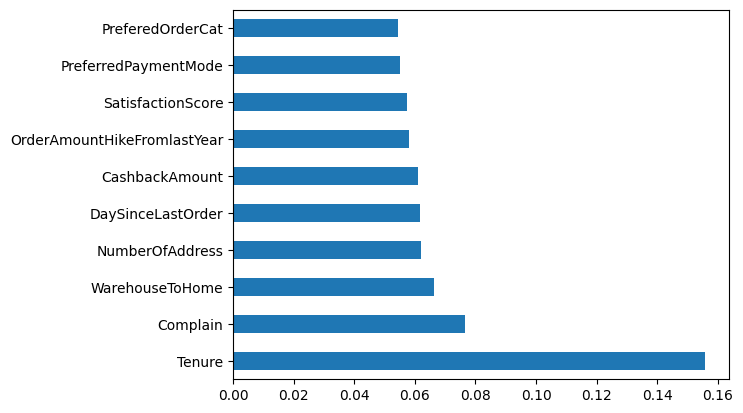

In [90]:
# Menggunakan ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop(['Churn'], axis=1)  #independent columns
y = df['Churn']    #target column

tree = ExtraTreesClassifier()
tree.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Modelling

### Split Data

In [91]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
from sklearn.model_selection import train_test_split

### Sampling

In [92]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [93]:
# Oversampling
ros = RandomOverSampler(random_state=0)
X_over, y_over = ros.fit_resample(X, y)
counter = Counter(y_over)
print(counter)

Counter({1: 4540, 0: 4540})


### Melakukan Splitting Data dengan X dan Y baru

In [94]:
# X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under, test_size=0.2, random_state=92)
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over,y_over, test_size=0.2, random_state=92)

### Menggunakan Model Logistic Regression (dengan Oversampling)

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=7600)

# Melatih model
logreg.fit(X_over_train,y_over_train)
# Menggunakan model yang sudah dilatih untuk prediksi
y_over_pred_train = logreg.predict(X_over_train)
y_over_pred_test = logreg.predict(X_over_test)

In [96]:
# Accuracy Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
akurasi_train = accuracy_score(y_over_train, y_over_pred_train)
akurasi_test = accuracy_score(y_over_test, y_over_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.8049284140969163
Akurasi data test = 0.7962555066079295


### Menggunakan Model Random Forest (dengan Oversampling)

In [97]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()

# Melatih model
randomforest.fit(X_over_train, y_over_train)

# Menggunakan model yang sudah dilatih untuk memprediksi
y_over_pred_train = randomforest.predict(X_over_train)
y_over_pred_test = randomforest.predict(X_over_test)

In [98]:
# Accuracy Score
akurasi_train = accuracy_score(y_over_train, y_over_pred_train)
akurasi_test = accuracy_score(y_over_test, y_over_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 1.0
Akurasi data test = 0.9933920704845814


In [99]:
# Classification Report

print(classification_report(y_over_test, y_over_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       895
           1       0.99      1.00      0.99       921

    accuracy                           0.99      1816
   macro avg       0.99      0.99      0.99      1816
weighted avg       0.99      0.99      0.99      1816



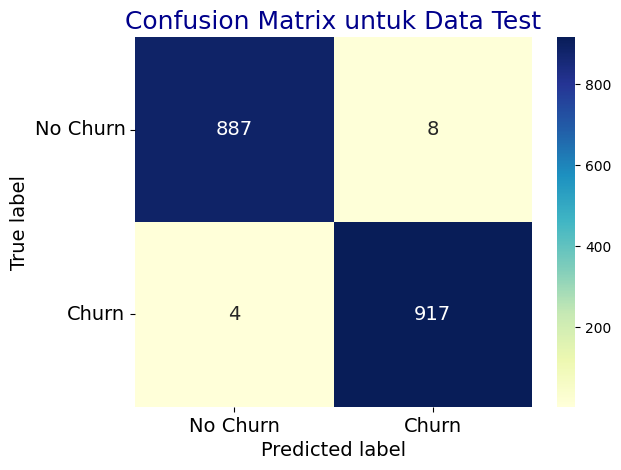

In [100]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_over_test, y_over_pred_test)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Menggunakan Model Decision Tree (dengan Oversampling)

In [101]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
# Melatih model
tree.fit(X_over_train, y_over_train)
# Memprediksi dengan hasil latihan
y_over_pred_train = tree.predict(X_over_train)
y_over_pred_test = tree.predict(X_over_test)

In [102]:
# Accuracy Score
akurasi_train = accuracy_score(y_over_train, y_over_pred_train)
akurasi_test = accuracy_score(y_over_test, y_over_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 1.0
Akurasi data test = 0.986784140969163


## Pemilihan Model

Dari ketiga model, dipilih RandomForestClassifier dengan akurasi 99% untuk memprediksi dari file CSV. Pertama-tama kita save model kita terlebih dahulu.

In [103]:
# Save Model
import pickle
with open('randomforest.pickle', 'wb') as f:
    pickle.dump(randomforest, f)

In [104]:
# Load Model
with open('randomforest.pickle', 'rb') as f:
    model = pickle.load(f)

## Prediksi

In [105]:
# Pre-processing dataframe inputan
inputan = pd.read_csv("/kaggle/input/olc-data-science-final-project/test.csv")
inputan.set_index('id', inplace=True)
kolom_null = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed','OrderCount','DaySinceLastOrder']
for kolom in kolom_null:
    inputan[kolom] = inputan[kolom].fillna(inputan[kolom].median())
kolom_kategorikal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Gender']
LE = LabelEncoder()
for kolom in kolom_kategorikal:
  inputan[kolom] = LE.fit_transform(inputan[kolom])

# Prediksi
predict = model.predict(inputan)
predict

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

## Save Prediction to CSV

In [106]:
# prediction = pd.DataFrame(predict, columns=['prediction'], inputan, columns=['id']).to_csv('prediction.csv')
inputan.reset_index(inplace = True) 
output = pd.DataFrame(data={"id":inputan["id"],"Prediction":predict})
output.to_csv('output.csv')

In [107]:
prediction = pd.read_csv("/kaggle/working/output.csv")
prediction.head()
submission = prediction.drop(['Unnamed: 0'], axis=1)
submission.to_csv('submission.csv')